# 비정상 절차서 21-11 : <font color=blue>PZR 살수밸브 BB-PV444C/444D 고장 '열림'

1. 경보 및 증상
2. 자동 동작사항
3. 긴급 조치사항
4. 후속 조치사항

## <font color=blue>1.0 데이터 처리

In [2]:
import pickle
import matplotlib.pyplot as plt
from collections import deque
# with open('D:/CRONI_New_Interface/new_db_30mal/ab23_06_30004_(175).pkl', 'rb') as f:
with open('D:/이상현/9._.CNS_Platform(멀티 CNS 실행)/상현CNN/Data_pkl/ab21_11_70_(323).pkl', 'rb') as f:
    db = pickle.load(f)
sym_ch = {0:deque(maxlen=5), 1:deque(maxlen=5), 2:deque(maxlen=5), 3:deque(maxlen=5), 'CPPRZL':deque(maxlen=5), 'PPRZ':deque(maxlen=5)}

## <font color=blue>2.0 경보 및 증상 

### <font color=blue>2.1 PZR 살수밸브 ‘열림’ 지시 및 상태 표시등 점등  - <font color=green>만족

#### ◦ 위치 지시등 : BB-ZL444C 또는 BB-ZL444D ‘열림’ 점등   - <font color=red>불만족
#### ◦ 상태 표시등(RL-QL-3G)   - <font color=red>불만족
#### PRZR SPRAY V/V BB-PV-444C NOT CLOSED 점등 또는   - <font color=red>불만족
####         PRZR SPRAY V/V BB-PV-444D NOT CLOSED 점등   - <font color=red>불만족

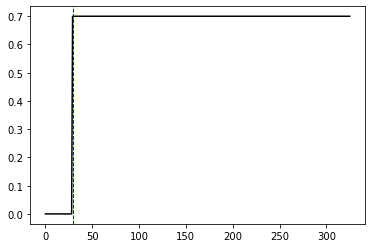

In [3]:
# BPRZSP : 가압기 살수밸브
plt.plot(db['BPRZSP'], color='k') # -> 압력 감소 확인
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

In [5]:
PRZ_spray = []
for i in range(len(db)):
    if i > 29:
        if db['BPRZSP'][i] != 0 :
            PRZ_spray.append(i+1)
if len(PRZ_spray) == 0:
    print('증상을 만족하지 못했습니다.')
else:
    print(f'가압기 SPRAY 밸브 열림 만족 시간 : {PRZ_spray[0]}초')

가압기 SPRAY 밸브 열림 만족 시간 : 31초


<font color=red>REPORT 

<font color=red>Spray valve 는 열리지만 밑에 있는 상태등의 점등이나 표시등 점등은 알 수가 없음.

### <font color=blue>2.2 PZR 보조전열기 켜짐 지시 및 경보 발생(155.4㎏/㎠) - <font color=green>만족
#### ◦ 보조전열기 A/B/D/E：자동 ‘ON’
#### ◦ 경보명 : PZR PRESS LO/BACK UP HEATERS ON

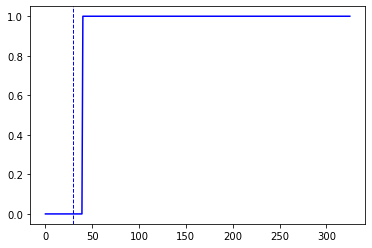

In [7]:
# QPRZB = 보조전열기 전원 확인 변수
plt.plot(db['QPRZB']*0.000001, color='b') # -> 보조전열기 전원 확인
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

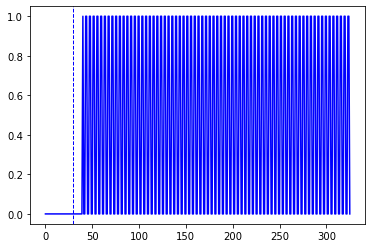

In [12]:
# KLAMPO312 = PZR PRESS LO/BACK UP HEATERS ON 경보 
plt.plot(db['KLAMPO312'], color='b')
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

In [11]:
Back_heat_onoff = []
for i in range(len(db)):
    if i > 29:
        if db['PPRZN'][i] < db['CQPRZB'][i] and db['KBHON'][i]  == 1 :
            if db['KLAMPO312'][i]  == 1:
                Back_heat_onoff.append(i+1)
if len(Back_heat_onoff) == 0:
    print('증상을 만족하지 못했습니다.')
else:
    print(f' PZR 모든 전열기 작동 및 경보 발생 만족 시간 : {Back_heat_onoff[0]}초')

 PZR 모든 전열기 작동 및 경보 발생 만족 시간 : 41초


### <font color=blue>2.3 	PZR 살수관 온도(BB-TI451/452) 증가  - <font color=red>불만족

<font color=red>REPORT 

<font color=red>살수관 온도 변수의 존재가 안보임.

### <font color=blue>2.4	PZR 저압력 지시(BB-PI444, 445, 455, 456, 457) 및 경보 발생(153.6㎏/㎠) - <font color=green>만족

#### ◦ 경보명 : PZR PRESS LOW(BB-PT445)

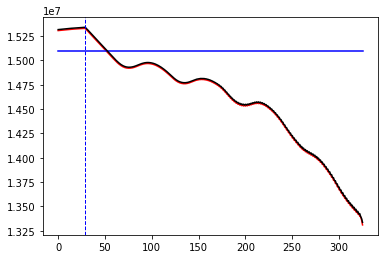

In [14]:
# KLAMPO308 : "PZR PRESS LOW"(BB-PT445) 경보
 # -> "PZR PRESS LOW"(BB-PT445) 경보 발생 확인
plt.plot(db['PPRZ'], color='r') #실제 압력
plt.plot(db['CPPRZL'], color='b') #저 압력 기준치
plt.plot(db['ZINST58']*98067, color='k') # 압력 지시치
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

In [15]:
PRZ_low_pre = []
for i in range(len(db)):
    if i > 29:
        if db['PPRZ'][i] < db['CPPRZL'][i]:
            PRZ_low_pre.append(i+1)
if len(PRZ_low_pre) == 0:
    print('증상을 만족하지 못했습니다.')
else:
    print(f'가압기 "저" 지시 만족 시간 : {PRZ_low_pre[0]}초')

가압기 "저" 지시 만족 시간 : 53초


### <font color=blue>2.5  PZR 압력 보호채널(BB-PI455, 456, 457) ‘저’ 압력 연동 경보발생(153.6㎏/㎠) 및 PZR PORV 차단밸브(BB-HV005, 006, 007) 닫힘   - <font color=green>만족

#### ◦ 경보명 : PZR LO PRESS INTERLOCK

<font color=red>REPORT 

<font color=red>PZR 압력 보호채널(BB-PI455, 456, 457) ‘저’ 압력 연동 경보 변수 찾을 수 없어서 수치로 대체


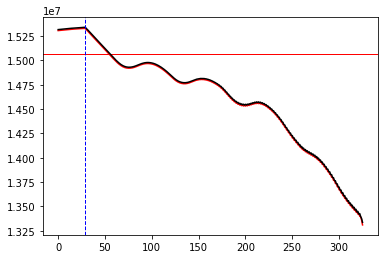

In [50]:
# KLAMPO308 : "PZR PRESS LOW"(BB-PT445) 경보
 # -> "PZR PRESS LOW"(BB-PT445) 경보 발생 확인
plt.plot(db['PPRZ'], color='r') #실제 압력
vline = plt.axhline(153.6*98067, color='r', linestyle='-', linewidth=1)
plt.plot(db['ZINST58']*98067, color='k') # 압력 지시치
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

In [51]:
PRZ_low_int = []
for i in range(len(db)):
    if i > 29:
        if db['PPRZ'][i] < 153.6*98067:
            PRZ_low_int.append(i+1)
if len(PRZ_low_int) == 0:
    print('증상을 만족하지 못했습니다.')
else:
    print(f'가압기 "저" 지시 만족 시간 : {PRZ_low_int[0]}초')

가압기 "저" 지시 만족 시간 : 56초


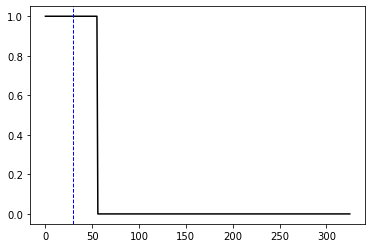

In [16]:
# BHV6 : PZR PORV 차단밸브
# "PZR LO PRESS INTERLOCK" 경보발생(153.6㎏/㎠) 없음
plt.plot(db['BHV6'], color='k') # -> PZR PORV 차단밸브 확인
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

In [54]:
BHV6 = []
for i in range(len(db)):
    if i > 29:
        if db['BHV6'][i] == 0 and db['PPRZ'][i] < 153.6*98067:
            BHV6.append(i+1)
if len(BHV6) == 0:
    print('증상을 만족하지 못했습니다.')
else:
    print(f'BHV6 밸브 닫힘 증상 만족 시간 : {BHV6[0]}초')

BHV6 밸브 닫힘 증상 만족 시간 : 57초


### <font color=blue>2.6	PZR 압력 138.5㎏/㎠(P-11) 이하시 "PZR PRESS NOT HI(P-11)" 경보 발생 - <font color=green>만족

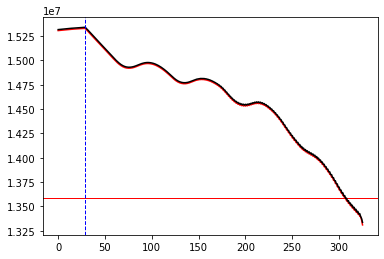

In [18]:
# KLAMPO308 : "PZR PRESS LOW"(BB-PT445) 경보
 # -> "PZR PRESS LOW"(BB-PT445) 경보 발생 확인
plt.plot(db['PPRZ'], color='r') #실제 압력
vline = plt.axhline(138.5*98067, color='r', linestyle='-', linewidth=1)
plt.plot(db['ZINST58']*98067, color='k') # 압력 지시치
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

In [23]:
PRZ_low_P11 = []
for i in range(len(db)):
    if i > 29:
        if db['PPRZ'][i] < 138.5*98067:
            PRZ_low_P11.append(i+1)
if len(PRZ_low_P11) == 0:
    print('증상을 만족하지 못했습니다.')
else:
    print(f'가압기 "저" 지시 만족 시간 : {PRZ_low_P11[0]}초')

가압기 "저" 지시 만족 시간 : 309초


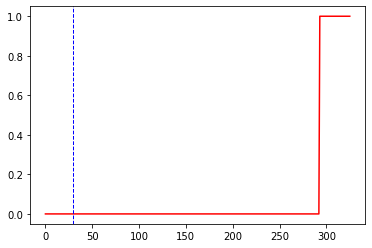

In [19]:
# KLAMPO216 = PERMISSIVE SIGNAL, P-11
plt.plot(db['KLAMPO216'], color='r')
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

In [20]:
P_11 = []
for i in range(len(db)):
    if i > 29:
        if db['KLAMPO216'][i] == 1:
            P_11.append(i+1)
if len(P_11) == 0:
    print('증상을 만족하지 못했습니다.')
else:
    print(f'P_11 경보 증상 만족 시간 : {P_11[0]}초')

P_11 경보 증상 만족 시간 : 294초


### <font color=blue>2.7	PZR 수위 급격한 증가  - <font color=red>불만족

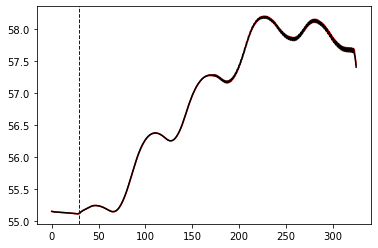

In [29]:
# ZPRZ : 가압기 실제 수위
# ZINST63 : 가압기 수위 지시치 
plt.plot(db['ZINST63'], color='r') 
plt.plot(db['ZPRZ']*10, color='k')
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

<font color=red>REPORT 

<font color=red>향후 이동평균선을 고려하여 수정 예정 이라고 함.

### <font color=blue>2.8	Rx 트립 작동 및 "PZR PRESS LOW ALERT" 경보 발생(136.8㎏/㎠)  - <font color=green>만족

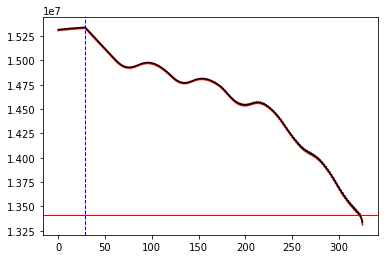

In [30]:
# KLAMPO308 : "PZR PRESS LOW"(BB-PT445) 경보
 # -> "PZR PRESS LOW"(BB-PT445) 경보 발생 확인
plt.plot(db['PPRZ'], color='r') #실제 압력
vline = plt.axhline(136.8*98067, color='r', linestyle='-', linewidth=1)
plt.plot(db['ZINST58']*98067, color='k') # 압력 지시치
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

In [34]:
PRZ_low_alr = []
for i in range(len(db)):
    if i > 29:
        if db['PPRZ'][i] < 136.8*98067 and db['KRXTRIP'][i] == 1 :
            PRZ_low_alr.append(i+1)
if len(PRZ_low_alr) == 0:
    print('증상을 만족하지 못했습니다.')
else:
    print(f'가압기 "저" 지시 만족 시간 : {PRZ_low_alr[0]}초')

가압기 "저" 지시 만족 시간 : 324초


### <font color=blue>2.9	SI 작동 및 "PZR PRESS LOW SI ALERT" 경보 발생(126.7㎏/㎠) - <font color=green>만족

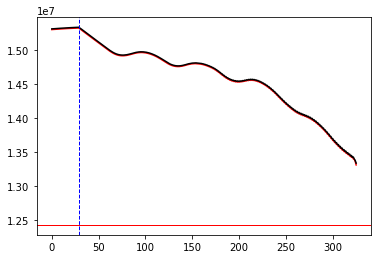

In [35]:
# KLAMPO308 : "PZR PRESS LOW"(BB-PT445) 경보
 # -> "PZR PRESS LOW"(BB-PT445) 경보 발생 확인
plt.plot(db['PPRZ'], color='r') #실제 압력
vline = plt.axhline(126.7*98067, color='r', linestyle='-', linewidth=1)
plt.plot(db['ZINST58']*98067, color='k') # 압력 지시치
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

In [37]:
PRZ_low_alr = []
for i in range(len(db)):
    if i > 29:
        if db['PPRZ'][i] < 126.7*98067 and db['KSAFEI'][i] == 1 :
            PRZ_low_alr.append(i+1)
if len(PRZ_low_alr) == 0:
    print('증상을 만족하지 못했습니다.')
else:
    print(f'SI 작동 만족 시간 : {PRZ_low_alr[0]}초')

증상을 만족하지 못했습니다.


## <font color=blue>3.0 자동 동작사항

### <font color=blue>3.1	PZR 전열기 모두 켜짐(155.4㎏/㎠)  - <font color=green>만족

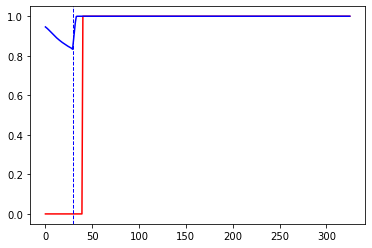

In [38]:
# QPRZB : 비례전열기 전원
# QPRZH : 보조전열기 전원
plt.plot(db['QPRZB']*0.000001, color='r') # -> 비례전열기 전원 확인
plt.plot(db['QPRZH'], color='b') # -> 보조전열기 전원 확인
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

In [42]:
QPRZ_onoff = []
for i in range(len(db)):
    if i > 29:
        if db['QPRZB'][i]*0.000001 > 0.2 and db['QPRZH'][i] > 0.2 :
            QPRZ_onoff.append(i+1)
if len(QPRZ_onoff) == 0:
    print('증상을 만족하지 못했습니다.')
else:
    print(f'경보 및 SI 작동 만족 시간 : {QPRZ_onoff[0]}초')

경보 및 SI 작동 만족 시간 : 41초


### <font color=blue>3.2	PZR PORV 차단밸브(BB-HV005, 006, 007) 닫힘(153.6㎏/㎠) - <font color=green>만족

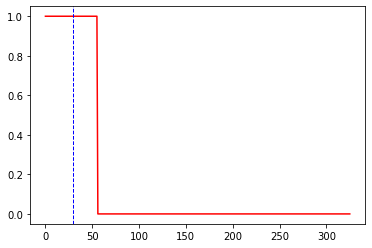

In [44]:
# BHV6 = PORV 차단 밸브 포지션  
plt.plot(db['BHV6'], color='r') # PORV 차단 밸브 포지션  
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

In [45]:
BHV6 = []
for i in range(len(db)):
    if i > 29:
        if db['BHV6'][i] == 0:
            BHV6.append(i+1)
if len(BHV6) == 0:
    print('증상을 만족하지 못했습니다.')
else:
    print(f'BHV6 밸브 닫힘 증상 만족 시간 : {BHV6[0]}초')

BHV6 밸브 닫힘 증상 만족 시간 : 57초


### <font color=blue>3.3	Rx 트립(136.8㎏/㎠) - <font color=green>만족

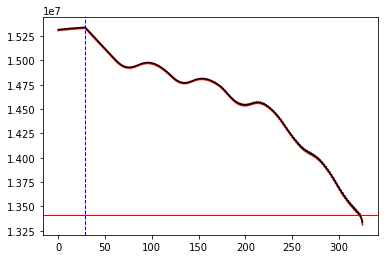

In [46]:
# KLAMPO308 : "PZR PRESS LOW"(BB-PT445) 경보
 # -> "PZR PRESS LOW"(BB-PT445) 경보 발생 확인
plt.plot(db['PPRZ'], color='r') #실제 압력
vline = plt.axhline(136.8*98067, color='r', linestyle='-', linewidth=1)
plt.plot(db['ZINST58']*98067, color='k') # 압력 지시치
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

In [47]:
PRZ_low_trip = []
for i in range(len(db)):
    if i > 29:
        if db['PPRZ'][i] < 136.8*98067 and db['KRXTRIP'][i] == 1 :
            PRZ_low_trip.append(i+1)
if len(PRZ_low_trip) == 0:
    print('증상을 만족하지 못했습니다.')
else:
    print(f' Rx trip 만족 시간 : {PRZ_low_trip[0]}초')

 Rx trip 만족 시간 : 324초


### <font color=blue>3.4	SI 작동(126.7㎏/㎠)  - <font color=red>불만족

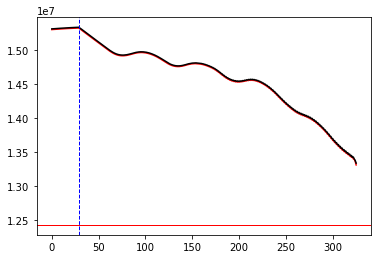

In [48]:
# KLAMPO308 : "PZR PRESS LOW"(BB-PT445) 경보
 # -> "PZR PRESS LOW"(BB-PT445) 경보 발생 확인
plt.plot(db['PPRZ'], color='r') #실제 압력
vline = plt.axhline(126.7*98067, color='r', linestyle='-', linewidth=1)
plt.plot(db['ZINST58']*98067, color='k') # 압력 지시치
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

In [49]:
PRZ_low_SI = []
for i in range(len(db)):
    if i > 29:
        if db['PPRZ'][i] < 126.7*98067 and db['KSAFEI'][i] == 1 :
            PRZ_low_SI.append(i+1)
if len(PRZ_low_SI) == 0:
    print('증상을 만족하지 못했습니다.')
else:
    print(f'SI 작동 만족 시간 : {PRZ_low_SI[0]}초')

증상을 만족하지 못했습니다.
